In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [2]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
import numpy as np

In [3]:

# Load the dataset
data = pd.read_csv('New_data.csv')



In [15]:
data.info

<bound method DataFrame.info of       Unnamed: 0                                         reviewText  \
0              0  I think this game cannot be called a Sonic The...   
1              1  I bought this to charge my wii remotes as well...   
2              2         Are super buggy and mess up the game play!   
3              3  basic lazy nothing out of the ordinary. save y...   
4              4  I loved just cause 2. This game is 10 times wo...   
...          ...                                                ...   
4494        4495  Package was extremely well packed and shipped....   
4495        4496  The ingenuity of this game is amazing. You con...   
4496        4497  Cable was easy to hookup and use. Worked well ...   
4497        4498  Tons of fun. Great characters. Relatively easy...   
4498        4499  I have seen some critical reviews and those re...   

     swn_sentiment  
0         positive  
1          neutral  
2         positive  
3         positive  
4         

In [30]:
# Preprocess the data (cleaning, lowercasing, etc.)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['reviewText'], data['swn_sentiment'], test_size=0.4, random_state=42)


In [31]:

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)



In [32]:
# Train the SVM model
model = svm.SVC()
model.fit(X_train, y_train)



SVC()

In [33]:
# Predict sentiment for the test set
y_pred = model.predict(X_test)
y_pred


array(['negative', 'positive', 'negative', ..., 'positive', 'negative',
       'positive'], dtype=object)

In [34]:
X_test.data

array([1.        , 0.12364097, 0.11789048, ..., 0.56532982, 0.41076238,
       0.20084272])

Confusion Matrix:
[[514   0 211]
 [ 60   0 124]
 [147   0 744]]


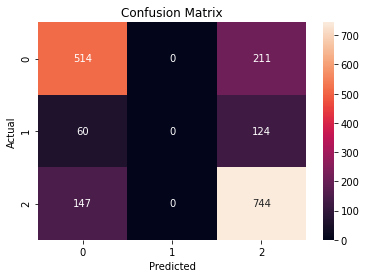

In [35]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# If you want to visualize the confusion matrix, you can use matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
labels = ['Positive, Negative, Neutral']
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [66]:
import numpy as np

matrix = np.matrix([[514, 0, 211], [60, 124, 0], [147, 302, 442]])
print(matrix)

[[514   0 211]
 [ 60 124   0]
 [147 302 442]]


Confusion Matrix:
[[431   1 126]
 [ 49   0  70]
 [124   0 549]]


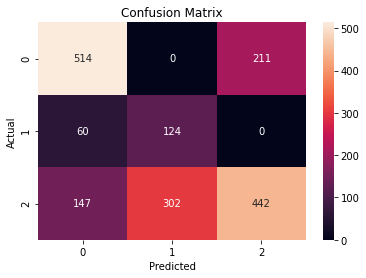

In [67]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# If you want to visualize the confusion matrix, you can use matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
labels = ['Positive, Negative, Neutral']
# Create a heatmap of the confusion matrix
sns.heatmap(matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [70]:
matrix

matrix([[514,   0, 211],
        [ 60, 124,   0],
        [147, 302, 442]])

In [38]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.6988888888888889
Precision: 0.46747536395448436
Recall: 0.5146607840860714


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall, and F1-score for overall classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Calculate accuracy, precision, recall, and F1-score for positive class
positive_indices = y_test == 'positive'  # Assuming 'positive' is the positive class label
y_test_positive = y_test[positive_indices]
y_pred_positive = y_pred[positive_indices]

accuracy_positive = accuracy_score(y_test_positive, y_pred_positive)
precision_positive = precision_score(y_test_positive, y_pred_positive, average='binary', pos_label='positive')
recall_positive = recall_score(y_test_positive, y_pred_positive, average='binary', pos_label='positive')
f1_positive = f1_score(y_test_positive, y_pred_positive, average='binary', pos_label='positive')

# Calculate accuracy, precision, recall, and F1-score for negative class
negative_indices = y_test == 'negative'  # Assuming 'negative' is the negative class label
y_test_negative = y_test[negative_indices]
y_pred_negative = y_pred[negative_indices]

accuracy_negative = accuracy_score(y_test_negative, y_pred_negative)
precision_negative = precision_score(y_test_negative, y_pred_negative, average='binary', pos_label='negative')
recall_negative = recall_score(y_test_negative, y_pred_negative, average='binary', pos_label='negative')
f1_negative = f1_score(y_test_negative, y_pred_negative, average='binary', pos_label='negative')

# Print the results
print("Overall Classification:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

print("Positive Class:")
print("Accuracy (Positive):", accuracy_positive)
print("Precision (Positive):", precision_positive)
print("Recall (Positive):", recall_positive)
print("F1-score (Positive):", f1_positive)

print("Negative Class:")
print("Accuracy (Negative):", accuracy_negative)
print("Precision (Negative):", precision_negative)
print("Recall (Negative):", recall_negative)
print("F1-score (Negative):", f1_negative)

Overall Classification:
Accuracy: 0.6988888888888889
Precision: 0.46747536395448436
Recall: 0.5146607840860714
F1-score: 0.48875221452258755
Positive Class:
Accuracy (Positive): 0.835016835016835
Precision (Positive): 1.0
Recall (Positive): 0.835016835016835
F1-score (Positive): 0.910091743119266
Negative Class:
Accuracy (Negative): 0.7089655172413794
Precision (Negative): 1.0
Recall (Negative): 0.7089655172413794
F1-score (Negative): 0.8297013720742534


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
accuracy_positive = accuracy_score(y_test_positive, y_pred_positive)
accuracy_negative = accuracy_score(y_test_negative, y_pred_negative)


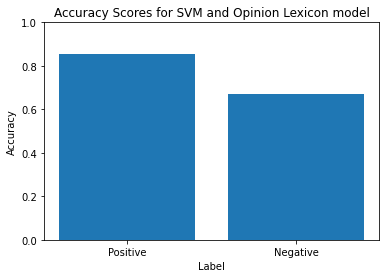

In [43]:
import matplotlib.pyplot as plt

# Assuming you have the accuracy scores available
accuracy_positive_1 = accuracy_positive
accuracy_positive_2 = 0.68
accuracy_negative_1 = accuracy_negative
accuracy_negative_2 = 0.66

# Create a bar chart
labels = ['Positive', 'Positive', 'Negative', 'Negative']
accuracy_scores = [accuracy_positive_1, accuracy_positive_2, accuracy_negative_1, accuracy_negative_2]

plt.bar(labels, accuracy_scores)
plt.xlabel('Label')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for SVM and Opinion Lexicon model')
plt.ylim(0, 1)  # Set the y-axis limits between 0 and 1
plt.show()

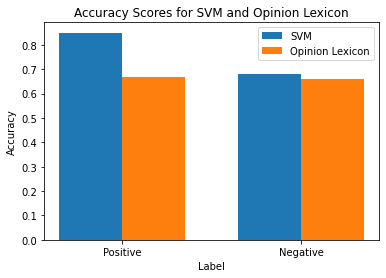

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the accuracy scores available
accuracy_positive = [0.85, 0.68]
accuracy_negative = [0.67, 0.66]

# Set the position of the bars
ind = np.arange(2)
width = 0.35

# Create a bar plot
fig, ax = plt.subplots()
positive_bars = ax.bar(ind, accuracy_positive, width, label='SVM')
negative_bars = ax.bar(ind + width, accuracy_negative, width, label='Opinion Lexicon')

# Set the labels, title, and legend
ax.set_xlabel('Label')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Scores for SVM and Opinion Lexicon')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Positive', 'Negative'))
ax.legend()
# Show the plot
plt.show()


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

# Load data (replace this line with loading your actual dataset)
data = pd.read_csv("New_data.csv")

# Split the dataset into features ('reviews') and labels ('sentiments')
X = data['reviewText']
y = data['swn_sentiment']

# Split the data into training and testing sets (80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

# Transform text reviews to numerical vectors using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create an SVM classifier with a linear kernel 
svm_classifier = SVC(kernel='linear')

# Train the classifier on the transformed training data
svm_classifier.fit(X_train_tfidf , y_train)

# Make predictions on test set
y_pred  = svm_classifier.predict(X_test_tfidf )

# Calculate scores: accuracy ,f1-score ,recall-score 
accuracy_svm  = accuracy_score(y_test,y_pred )
f1_svm        = f1_score(y_test,y_pred , average="weighted")

In [56]:
accuracy_svm

0.725925925925926

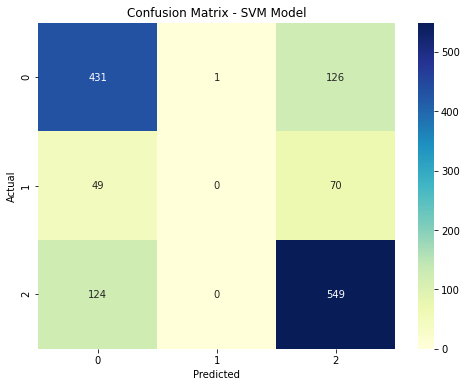

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot heatmap of the confusion matrix using Seaborn library
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM Model')
plt.show()

In [58]:
conf_mat

array([[431,   1, 126],
       [ 49,   0,  70],
       [124,   0, 549]], dtype=int64)